In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', \
        'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

In [3]:
adults = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',names=names,index_col=False)
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


### 1.How many males and females are there?

In [4]:
adults.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

### 2.What is the mean male age?

In [5]:
###2.What is the mean male age?
adults[adults['sex'].apply(lambda x: 'Male' in x)]['age'].mean()

39.43354749885268

### 3. What is the proportion of the US citizens?

In [6]:
# 3. What is the proportion of the US citizens?
adults['native-country'].value_counts()[' United-States']/len(adults)

0.895857006848684

### Plot the distribution of people’s education as a bar plot.


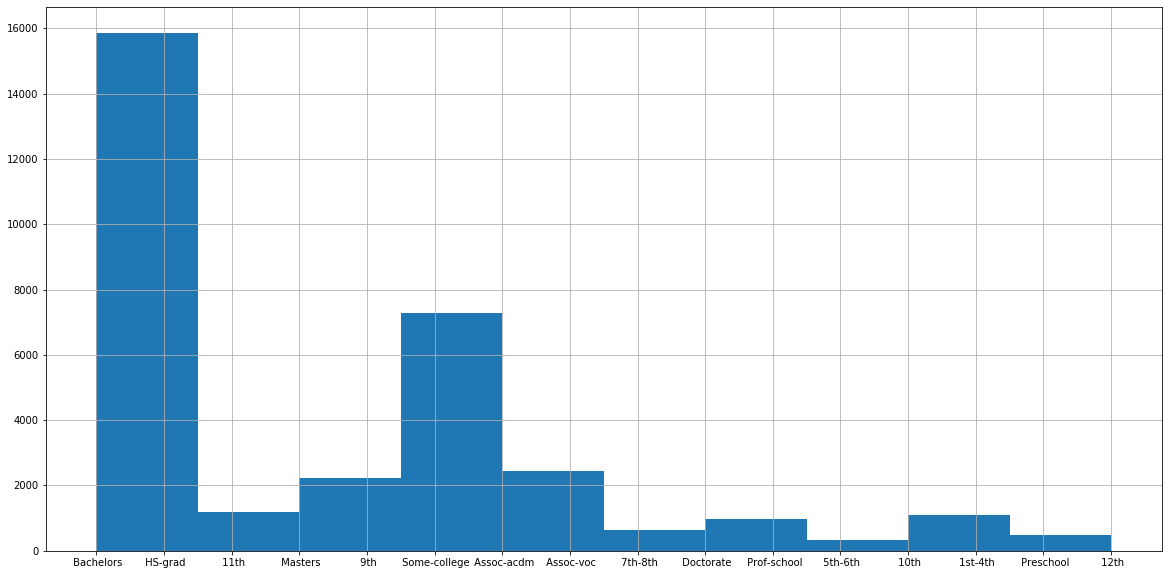

In [9]:
plt.figure(figsize=(20,10))
adults['education'].hist()

### What is the mean and standard deviation of the ”ﬁnal weight” for divorced people?


In [18]:
adults[adults['marital-status'].apply(lambda x: 'Divorced' in x)].fnlwgt.agg(['mean','std'])

mean    185802.790457
std     105646.789459
Name: fnlwgt, dtype: float64

###  Is it true that the people who receive over 50k are mostly highly educated?

In [25]:
a=adults[(adults['education-num'] >= 13) & (adults['capital-gain'] > 50000)]
b=adults[adults['capital-gain']>50000]
print(len(a)/len(b)>=0.5)

True


### What is the maximum male and female age for each race?


In [34]:
adults.groupby(['race','sex']).age.agg(['max','min'])

max  min
race                sex              
 Amer-Indian-Eskimo  Female   80   17
                     Male     82   17
 Asian-Pac-Islander  Female   75   17
                     Male     90   18
 Black               Female   90   17
                     Male     90   17
 Other               Female   74   17
                     Male     77   17
 White               Female   90   17
                     Male     90   17

### The people from which countries work as farmers/ﬁshers?

In [70]:
adults[adults['occupation'].apply(lambda x:'Farming-fishing' in x)]['native-country'].unique()

array([' United-States', ' Cambodia', ' Poland', ' Guatemala', ' Mexico',
       ' England', ' ?', ' Philippines', ' Italy', ' Puerto-Rico',
       ' Vietnam', ' Germany', ' Japan', ' Canada', ' Yugoslavia',
       ' Cuba', ' Portugal', ' El-Salvador', ' Hong', ' Ireland',
       ' France'], dtype=object)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country


###  Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?


In [85]:
m = len(adults[(adults['sex'].apply(lambda x: x.strip() == 'Male')) & (adults['education'].apply(lambda x: x.strip() == 'Bachelors'))])/ \
        len(adults[(adults['sex'].apply(lambda x: x.strip() == 'Male')) & (adults['education'].apply(lambda x: x.strip() == 'Masters'))])
f =len(adults[(adults['sex'].apply(lambda x: x.strip() == 'Female')) & (adults['education'].apply(lambda x: x.strip() == 'Bachelors'))])/ \
        len(adults[(adults['sex'].apply(lambda x: x.strip() == 'Female')) & (adults['education'].apply(lambda x: x.strip() == 'Masters'))])
if f>=m:
    print("Female")
else:
    print("Male")

Male


###   What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?


In [87]:
max_hour = adults['hours-per-week'].max()
count_ppl = adults[adults['hours-per-week'] == max_hour]
print('max hour = ', max_hour,'\n', 'people count =', len(count_ppl),'\n', 'income: ', count_ppl['capital-gain'].unique())

max hour =  99 
 people count = 85 
 income:  [    0  2354 15024  4416  6418  2407  2907  4386]
